In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('stats_responses.xlsx')
data.head()

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18
0,NaN,Male,17,France,Year 1,Scholarship,4.0,NaN,NaN,5-10,0,NaN,NaN,3,Several times a week,You study for yourself and not to pay debts,Yes,Negative impact,NaN
1,NaN,Non-binary,18,Spain,Year 1,Tuition-paying,1.0,3.0,POLHUM,15-20,2,No,NaN,2,Several times a week,"despite paying fees, i pay under 1,000€ and th...",No,Negative impact,NaN
2,NaN,Female,19,French,Year 2,Scholarship,5.0,1.0,POLHUM,5-10,0,No,NaN,2,Several times a week,"I could choose the school I wanted to go, I am...",No,No impact,Nope
3,NaN,Female,19,India,Year 2,Tuition-paying,2.0,5.0,ECOSOC,10-15,1,No,NaN,2,Once a week,NaN,No,No impact,NaN
4,NaN,Female,19,French,Year 1,Tuition-paying,NaN,1.0,NaN,10-15,0,NaN,NaN,3,Several times a week,NaN,NaN,NaN,NaN


In [4]:
data['Q4'] = data['Q4'].replace('Year 1', 1)
data['Q4'] = data['Q4'].replace('Year 2', 2)

In [5]:
data.head(3)

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18
0,NaN,Male,17,France,1,Scholarship,4.0,NaN,NaN,5-10,0,NaN,NaN,3,Several times a week,You study for yourself and not to pay debts,Yes,Negative impact,NaN
1,NaN,Non-binary,18,Spain,1,Tuition-paying,1.0,3.0,POLHUM,15-20,2,No,NaN,2,Several times a week,"despite paying fees, i pay under 1,000€ and th...",No,Negative impact,NaN
2,NaN,Female,19,French,2,Scholarship,5.0,1.0,POLHUM,5-10,0,No,NaN,2,Several times a week,"I could choose the school I wanted to go, I am...",No,No impact,Nope


In [6]:
data['Q5_encoded'] = data['Q5'].map({'Scholarship': 1, 'Tuition-paying': 0})
last_column = data.pop(data.columns[-1])
data.insert(data.columns.get_loc('Q6'), last_column.name, last_column)

In [7]:
data['Q6'] = data['Q6'].fillna(3.0)
data['Q6'] = data['Q6'].astype('int')

Q6_plt = data.loc[data['Q5'] == 'Tuition-paying', 'Q6']
Q6_plt = Q6_plt.replace('Tuition-paying', None)
Q6_plt.value_counts()

Q6
3    8
1    6
2    2
4    1
Name: count, dtype: int64

In [8]:
Q7_plt = data.loc[data['Q5'] == 'Scholarship', 'Q7']
Q7_plt = Q7_plt.replace('Scholarship', None)

Q7_plt = Q7_plt.fillna(3.0)
Q7_plt = Q7_plt.astype('int')
Q7_plt.value_counts()

Q7
3    9
1    4
4    1
5    1
2    1
Name: count, dtype: int64

In [9]:
data['Q8'] = data['Q8'].fillna('Not specified')
data['Q8'].value_counts()

Q8
Not specified    14
POLGOV            8
ECOSOC            7
POLHUM            4
Name: count, dtype: int64

In [10]:
data.columns

Index(['Unnamed: 0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q5_encoded', 'Q6', 'Q7',
       'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17',
       'Q18'],
      dtype='object')

In [11]:
data['Q10'] = data['Q10'].astype('str')
type(data['Q10'][1])

str

In [12]:
Q11_plt = data.loc[data['Q5'] == 'Tuition-paying', 'Q11']
Q11_plt = Q11_plt.replace('Tuition-paying', None)
Q11_plt.value_counts()

Q11
No    6
Name: count, dtype: int64

In [13]:
#Q12 is irrelevant since all students responded with no
data['Q13'].value_counts()

Q13
2    15
3    11
4     5
1     2
Name: count, dtype: int64

In [14]:
data['Q14'].value_counts()

Q14
Several times a week    12
Rarely/ never            7
Once a week              5
Daily                    5
Few times a month        4
Name: count, dtype: int64

In [15]:
#Q15 is irrelevant
Q16_plt = data.loc[data['Q5'] == 'Tuition-paying', 'Q16']
Q16_plt = Q16_plt.replace('Tuition-paying', None)
Q16_plt.value_counts()
#Q17 is irrelevant

Q16
No    5
Name: count, dtype: int64

In [16]:
data['Q6'] = Q6_plt
data['Q7'] = Q7_plt
data['Q11'] = Q11_plt
data['Q16'] = Q16_plt

data.head(3)

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q5_encoded,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18
0,NaN,Male,17,France,1,Scholarship,1,NaN,3.0,Not specified,5-10,0,NaN,NaN,3,Several times a week,You study for yourself and not to pay debts,NaN,Negative impact,NaN
1,NaN,Non-binary,18,Spain,1,Tuition-paying,0,1.0,NaN,POLHUM,15-20,2,No,NaN,2,Several times a week,"despite paying fees, i pay under 1,000€ and th...",No,Negative impact,NaN
2,NaN,Female,19,French,2,Scholarship,1,NaN,1.0,POLHUM,5-10,0,NaN,NaN,2,Several times a week,"I could choose the school I wanted to go, I am...",NaN,No impact,Nope


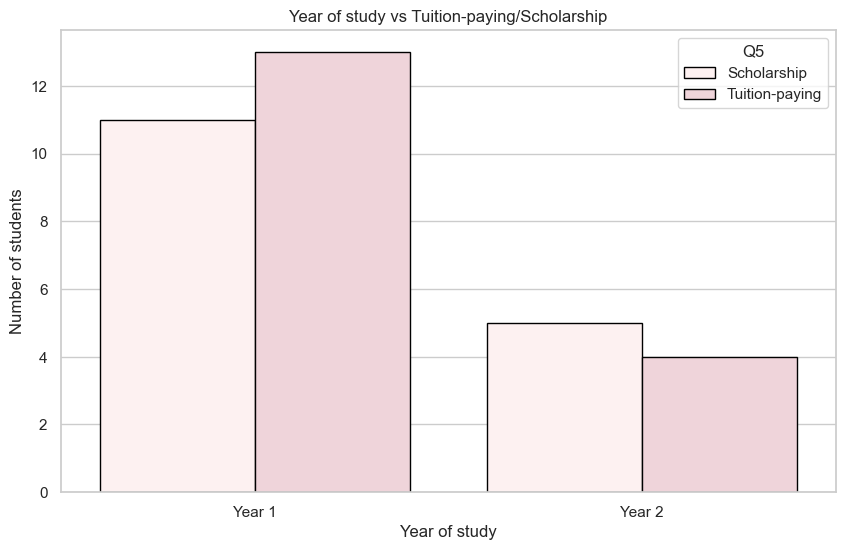

In [17]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='Q4', data=data, hue='Q5', palette=['#FFEFEF', '#F3D0D7'], edgecolor='black')
plt.xlabel('Year of study')
plt.ylabel('Number of students')
ax.set_xticklabels(['Year 1', 'Year 2'])

plt.title('Year of study vs Tuition-paying/Scholarship')
plt.show()

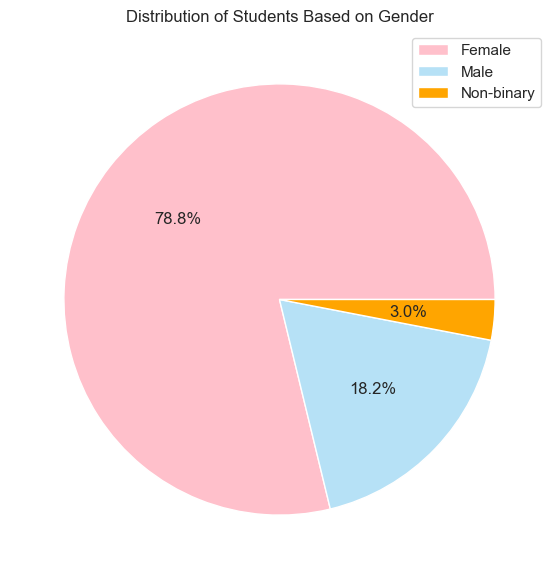

In [18]:
fig, ax = plt.subplots(figsize=(10, 7))

gender_counts = data['Q1'].value_counts()
total_responses = gender_counts.sum()

female_percentage = (gender_counts['Female'] / total_responses) * 100
male_percentage = (gender_counts['Male'] / total_responses) * 100
nonbinary_percentage = (gender_counts['Non-binary'] / total_responses) * 100

colors = ['pink', '#b6e1f6', 'orange']
plt.pie(gender_counts, colors=colors, autopct='%1.1f%%')
plt.legend(data['Q1'].value_counts().index)

plt.title('Distribution of Students Based on Gender')

plt.show()

In [19]:
data['Q3'] = data['Q3'].replace('French', 'France')
data['Q3'] = data['Q3'].replace('France ', 'France')
data['Q3'] = data['Q3'].replace('Romanian', 'Romania')
data['Q3'] = data['Q3'].replace('Chinese', 'China')

data['Q3'].value_counts()

Q3
France         21
India           2
Romania         2
China           2
Spain           1
USA             1
Japan           1
Bangladesh      1
German          1
Bulgarian       1
Name: count, dtype: int64

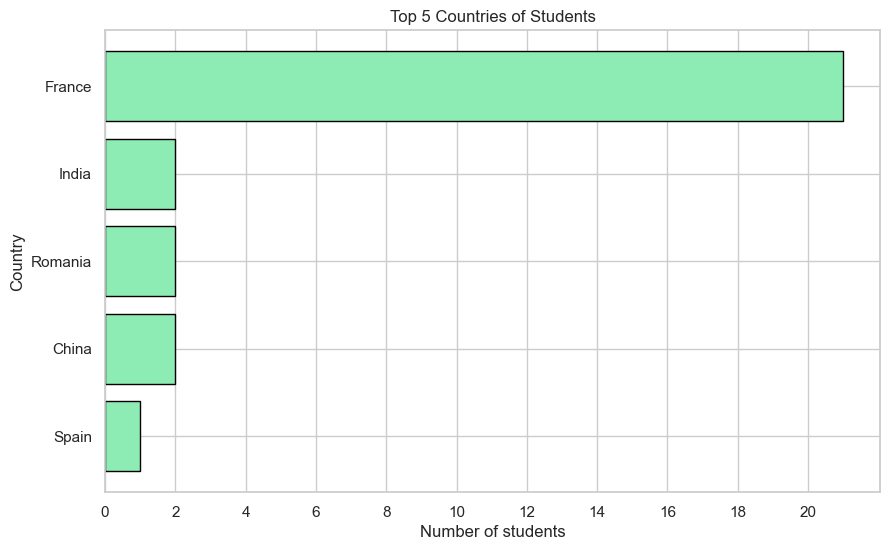

In [20]:
country_counts = data['Q3'].value_counts()

# Select top 5 countries based on counts
top_countries = country_counts.head(5)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting horizontal bars
bars = plt.barh(top_countries.index, top_countries.values, color='#8DECB4', edgecolor='black')

# Adding labels and title
plt.xlabel('Number of students')
plt.ylabel('Country')
plt.title('Top 5 Countries of Students')

# Invert y-axis to display countries in descending order
plt.gca().invert_yaxis()

ax.set_xticks(np.arange(0, 21, 2))

plt.show()


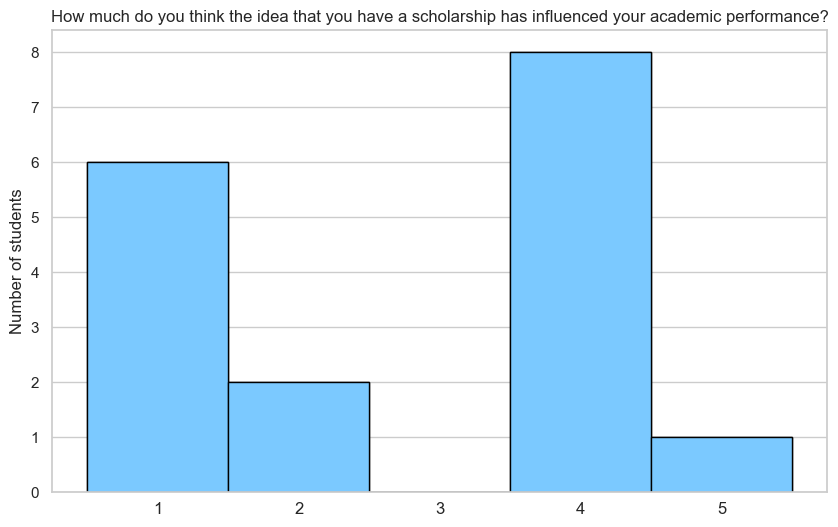

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram with specified bins and custom colors
data['Q6'].plot(kind='hist', bins=5, color='#7BC9FF', edgecolor='black')

# Get the counts for each bin
counts, bins, patches = ax.hist(data['Q6'], bins=5, color='#7BC9FF', edgecolor='black')

# Add numbers centered under each bin
for i in range(len(bins) - 1):
    bin_center = (bins[i] + bins[i+1]) / 2  # Calculate the center of the bin
    plt.text(bin_center, -0.4, str(i+1), ha='center', transform=ax.transData)

ax.xaxis.set_visible(False)

plt.title('How much do you think the idea that you have a scholarship has influenced your academic performance?')
plt.ylabel('Number of students')

plt.show()

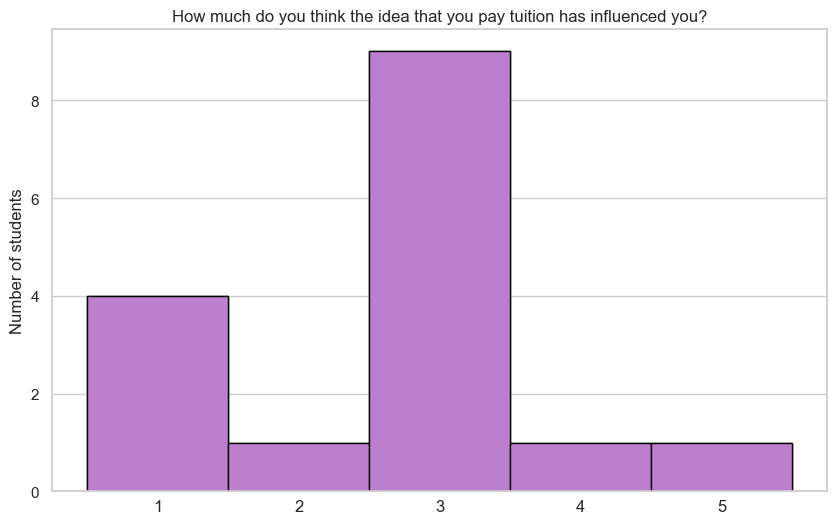

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram with specified bins and custom colors
data['Q7'].plot(kind='hist', bins=5, color='#BC7FCD', edgecolor='black')

# Get the counts for each bin
counts, bins, patches = ax.hist(data['Q7'], bins=5, color='#BC7FCD', edgecolor='black')

# Add numbers centered under each bin
for i in range(len(bins) - 1):
    bin_center = (bins[i] + bins[i+1]) / 2  # Calculate the center of the bin
    plt.text(bin_center, -0.4, str(i+1), ha='center', transform=ax.transData)

ax.xaxis.set_visible(False)

plt.title('How much do you think the idea that you pay tuition has influenced you?')
plt.ylabel('Number of students')

plt.show()

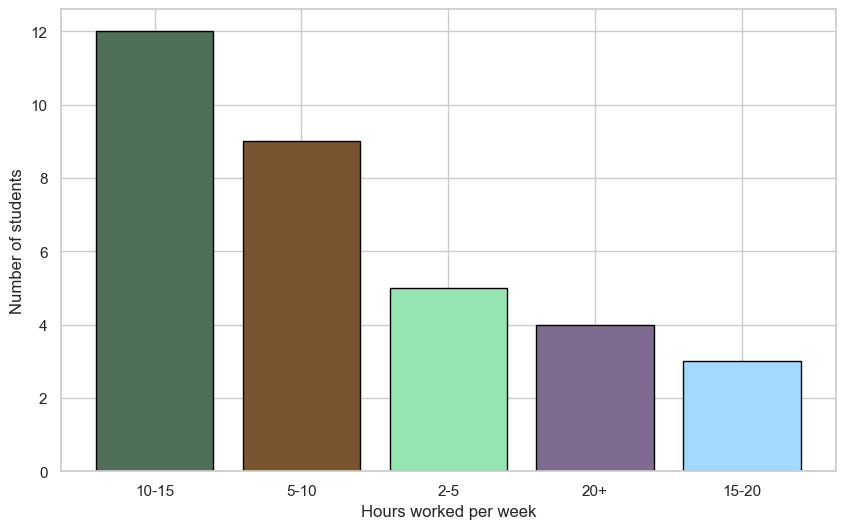

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

#plot for Q9
plt.bar(data['Q9'].value_counts().index, data['Q9'].value_counts().values, color=['#4E6E58', '#7A542E', '#96E6B3', '#7E6B8F', '#A3D9FF'], edgecolor='black')
plt.xlabel('Hours worked per week')
plt.ylabel('Number of students')

plt.show()

In [24]:
data['Q13'].value_counts()

Q13
2    15
3    11
4     5
1     2
Name: count, dtype: int64

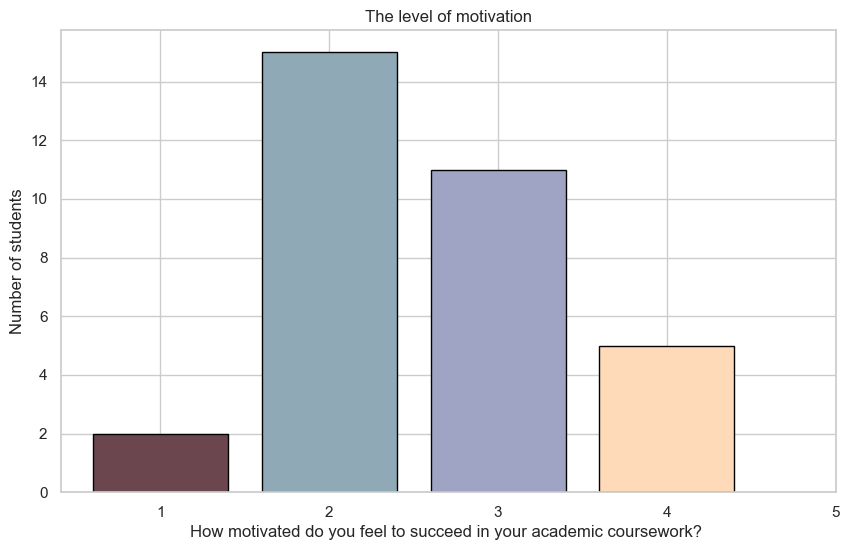

In [25]:
#plot for Q13

fig, ax = plt.subplots(figsize=(10, 6))

plt.bar(data['Q13'].value_counts().index, data['Q13'].value_counts().values, color=['#90A9B7', '#9FA4C4', '#FFDAB9', '#6C464F', '#9FA4C4'], edgecolor='black')
ax.set_xticks(np.arange(1, 6, 1))
plt.title('The level of motivation')
plt.xlabel('How motivated do you feel to succeed in your academic coursework? ')
plt.ylabel('Number of students')

plt.show()

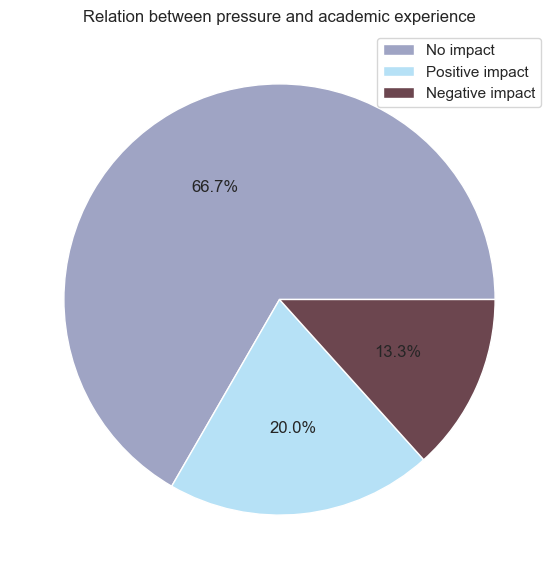

In [31]:
#If yes, how does this pressure affect your academic experience?
fig, ax = plt.subplots(figsize=(10, 7))

plt.pie(data['Q17'].value_counts(), colors = ['#9FA4C4', '#b6e1f6', '#6C464F'], autopct='%1.1f%%')
plt.legend(data['Q17'].value_counts().index, loc='upper right')

plt.title('Relation between pressure and academic experience')
plt.show()

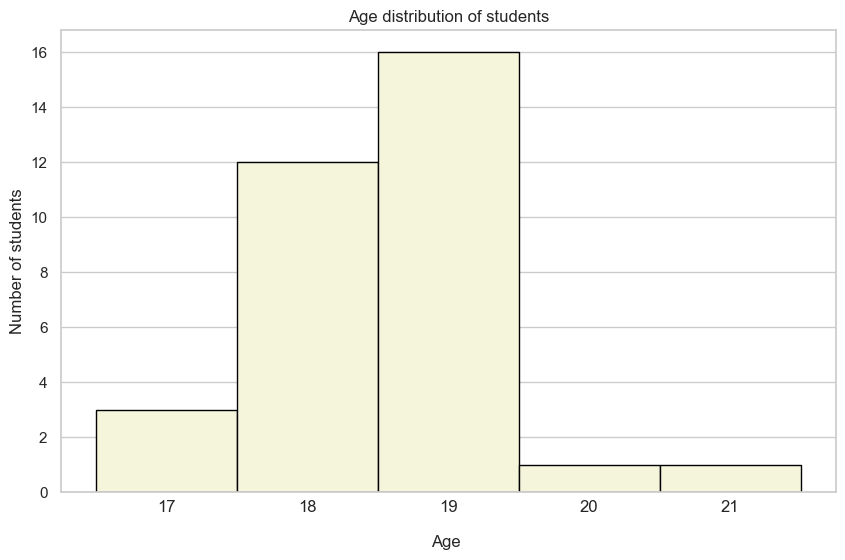

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))

counts, bins, patches = ax.hist(data['Q2'], bins=5, color='beige', edgecolor='black')

j=17

# Add numbers centered under each bin
for i in range(len(bins) - 1):
    bin_center = (bins[i] + bins[i+1]) / 2  # Calculate the center of the bin
    plt.text(bin_center, -0.7, j, ha='center', transform=ax.transData)
    j+=1

ax.xaxis.set_visible(False)
ax.set_ylabel('Number of students')
plt.text(18.9, -2, 'Age')
plt.title('Age distribution of students')

plt.show()

SKEEWED!!!

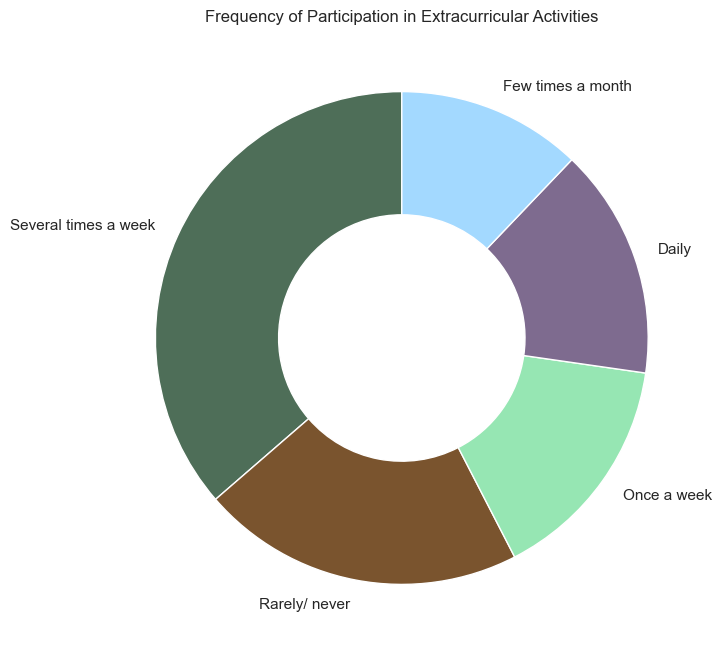

In [59]:
labels = data['Q14'].value_counts().index
sizes = data['Q14'].value_counts().values
colors = ['#4E6E58', '#7A542E', '#96E6B3', '#7E6B8F', '#A3D9FF']

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts = ax.pie(sizes, labels=labels, colors=colors,
                                   startangle=90, wedgeprops=dict(width=0.5))

ax.set_title('Frequency of Participation in Extracurricular Activities')

plt.show()

### Basic Stats

In [75]:
print('The mean level of motivation for students: {:.2f}\n'.format(data['Q13'].mean()))


print('Distribution of responses based on gender:\n{:.2f}% - female\n{:.2f}% - males\n{:.2f}% - non-binary'.format(female_percentage,
                                                                                                                  male_percentage,
                                                                                                                  nonbinary_percentage))

print('\nMean value of age: {:.2f}'.format(data['Q2'].mean())) #barelly legal tho
print('Standard deviation of the age: {:.2f}'.format(data['Q2'].std()))
print('Oldest person to fill the form: {}'.format(data['Q2'].max()))
print('Youngest person to fill the form: {}\n'.format(data['Q2'].min()))

print('The most common country of origin: {}\n'.format(data['Q3'].mode()[0]))

print('The most common number of hours worked per week: {}\n'.format(data['Q9'].mode()[0]))

print('The most common level of motivation: {}\n'.format(data['Q13'].mode()[0]))

# Calculate percentage for each category
perc_sev_times = (data['Q14'].value_counts(normalize=True)['Several times a week']) * 100
perc_nev = (data['Q14'].value_counts(normalize=True)['Rarely/ never']) * 100
perc_daily = (data['Q14'].value_counts(normalize=True)['Daily']) * 100
perc_once = (data['Q14'].value_counts(normalize=True)['Once a week']) * 100
perc_few_times = (data['Q14'].value_counts(normalize=True)['Few times a month']) * 100

# Print the correct percentages
print('Percentage of students that participate in extracurricular activities several times a week: {:.2f}%'.format(perc_sev_times))
print('Percentage of students that participate in extracurricular activities rarely/never: {:.2f}%'.format(perc_nev))
print('Percentage of students that participate in extracurricular activities daily: {:.2f}%'.format(perc_daily))
print('Percentage of students that participate in extracurricular activities once a week: {:.2f}%'.format(perc_once))
print('Percentage of students that participate in extracurricular activities few times a month: {:.2f}%'.format(perc_few_times))


The mean level of motivation for students: 2.58

Distribution of responses based on gender:
78.79% - female
18.18% - males
3.03% - non-binary

Mean value of age: 18.55
Standard deviation of the age: 0.83
Oldest person to fill the form: 21
Youngest person to fill the form: 17

The most common country of origin: France

The most common number of hours worked per week: 10-15

The most common level of motivation: 2

Percentage of students that participate in extracurricular activities several times a week: 36.36%
Percentage of students that participate in extracurricular activities rarely/never: 21.21%
Percentage of students that participate in extracurricular activities daily: 15.15%
Percentage of students that participate in extracurricular activities once a week: 15.15%
Percentage of students that participate in extracurricular activities few times a month: 12.12%
